# Emergency braking during simulated driving 

<br>

<hr>

## Description

This notebook explores the data that have been presented in 

Haufe S, Treder M S, Gugler M F, Sagebaum M, Curio G and
Blankertz B 2011 EEG potentials predict upcoming emergency
brakings during simulated driving J. Neural Eng. 8 056001

There were 18 subjects: VPae, VPbba, VPgab, VPgag, VPgam, VPja, VPbad, VPdx, VPgac, VPgah, VPih, VPsaj, VPbax, VPgaa, VPgae, VPgal, VPii, VPsal .

Their task was to drive a virtual car using the steering wheel and gas/brake pedals, and to tightly follow a computer-controlled lead vehicle. This lead vehicle occasionally decelerated abruptly. The driver was instructed to perform immediate emergency braking in these situations in order to avoid a crash.

In [1]:
# Imports
import scipy.io
import h5py
import time
from h5py import File 
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

In [2]:
# Path to raw data
path_data_mat = '/Users/obando_c/Documents/Neuro/EmergencyBraking/Data/Raw/'

# File name of one subject
file_name = "VPja.mat" 

# Path to save process data
path_postprocess_mat = '/Users/obando_c/Documents/Neuro/EmergencyBraking/data/post_processed/'

### Extract data

**cnt**  &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &nbsp;  *Structure containing the data of different channels: EEG, EMGf, 'lead_gas', 'lead_brake', 'dist_to_lead', 'wheel_X', 'wheel_Y', 'gas', 'brake'*  <br>
**mnt**  &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &nbsp;*Structure defining electrode positions*  <br>
**mrk** &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;  *Structure containing the braking event* <br>
<!--- **cnt.clab**  &emsp; &emsp; &emsp; &emsp;&emsp;*EEG electrodes names* <br> -->   
<!--- **mrk/className**   &emsp; *Names of the different types of events*--> 

In [3]:
start = time.time()
with h5py.File(path_data_mat + file_name, 'r') as f:
    print("Number of items in ",file_name, ": ", len(list(f)))
    print("Items inside ",file_name, ": ", list(f.items()))
    cnt = f.get('cnt')
    print("Items in cnt", list(cnt.items()) )
    T = np.array(cnt.get('T'))
    clab = np.array(cnt.get('clab')) # clab is the electrode names
    file = np.array(cnt.get('file'))
    fs = np.array(cnt.get('fs')) # fs is the sampling rate: 200
    title = np.array(cnt.get('title'))
    x = np.array(cnt.get('x')) # x is the continuous multivariate data
    
end = time.time()
print("Elapsed time:", (end - start), "s")

Number of items in  VPja.mat :  4
Items inside  VPja.mat :  [('#refs#', <HDF5 group "/#refs#" (144 members)>), ('cnt', <HDF5 group "/cnt" (6 members)>), ('mnt', <HDF5 group "/mnt" (8 members)>), ('mrk', <HDF5 group "/mrk" (4 members)>)]
Items in cnt [('T', <HDF5 dataset "T": shape (3, 1), type "<f8">), ('clab', <HDF5 dataset "clab": shape (69, 1), type "|O">), ('file', <HDF5 dataset "file": shape (8, 1), type "<u2">), ('fs', <HDF5 dataset "fs": shape (1, 1), type "<f8">), ('title', <HDF5 dataset "title": shape (22, 1), type "<u2">), ('x', <HDF5 dataset "x": shape (69, 1619951), type "<f8">)]
Elapsed time: 7.659092903137207 s


In [5]:
x.shape

(69, 1619951)

In [5]:
# Extract name of channels 
f = h5py.File(path_data_mat + file_name,'r') 
test = f['cnt/clab']
name_elec = list()
for j in range(len(test)):
    st = test[j][0]
    obj = f[st]
    str1 = ''.join(chr(i) for i in obj[:])
    name_elec.append(str1)
print("Names of channels:", name_elec)

Names of channels: ['EOGv', 'Fp1', 'Fp2', 'AF3', 'AF4', 'EOGh', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'EMGf', 'lead_gas', 'lead_brake', 'dist_to_lead', 'wheel_X', 'wheel_Y', 'gas', 'brake']


In [6]:
# Extract data mrk - contains information on the events
start = time.time()
with h5py.File(path_data_mat + file_name, 'r') as f:
    mrk = f.get('mrk')
    print("Items in mrk", list(mrk.items()) )
    className = np.array(mrk.get('className')) # are the names of the different types of events
    event = mrk.get('event') # 
    print("Items in event", list(event.items()) )
    react = np.array(event.get('react'))
    time_mrk = np.array(mrk.get('time')) # mrk.time is the timestamp for each event in milliseconds
    y = np.array(mrk.get('y')) # mrk.y is a binary matrix indicating which of the five types each event is
    
end = time.time()
print("Elapsed time:", (end - start), "s")

Items in mrk [('className', <HDF5 dataset "className": shape (5, 1), type "|O">), ('event', <HDF5 group "/mrk/event" (1 members)>), ('time', <HDF5 dataset "time": shape (948, 1), type "<f8">), ('y', <HDF5 dataset "y": shape (948, 5), type "<f8">)]
Items in event [('react', <HDF5 dataset "react": shape (1, 948), type "<f8">)]
Elapsed time: 0.005199909210205078 s


In [7]:
# Extract className
f = h5py.File(path_data_mat + file_name,'r') 
test = f['mrk/className']
className = list()
for j in range(len(test)):
    st = test[j][0]
    obj = f[st]
    str1 = ''.join(chr(i) for i in obj[:])
    className.append(str1)
print("Class names:",className)

Class names: ['car_normal', 'car_brake', 'car_hold', 'car_collision', 'react_emg']


### Create braking event variables 

**car_brake**  &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &nbsp;  *Times stamp in ms for lead vehicle starts to brake*  <br>
**react_emg**  &emsp; &emsp; &emsp;  &emsp; &emsp; &emsp; &nbsp;*The subject starts to brake. The onset is defined here through the EMG*  <br>
**car_collision** &emsp; &emsp; &emsp; &emsp; &emsp;  *Denotes collisions between driver and lead vehicle* <br>

In [8]:
car_brake = time_mrk.T*y[:,1] 
react_emg = time_mrk.T*y[:,4]
car_collision = time_mrk.T*y[:,3]
print("Number of events: ", len(car_brake[car_brake>0]))
print("Number of collision: ", len(car_collision[car_collision>0]))

Number of events:  230
Number of collision:  36


### Display all events events for subject 

Experiments consisted of three blocks (45 min each, marked with grey vertical dash) of driving with rest periods of 10–15 min in between.
During these blocks, 225 ± 17 critical (emergency braking) situations were artificially induced

Text(0.5, 1.0, 'Events subject VPja.mat')

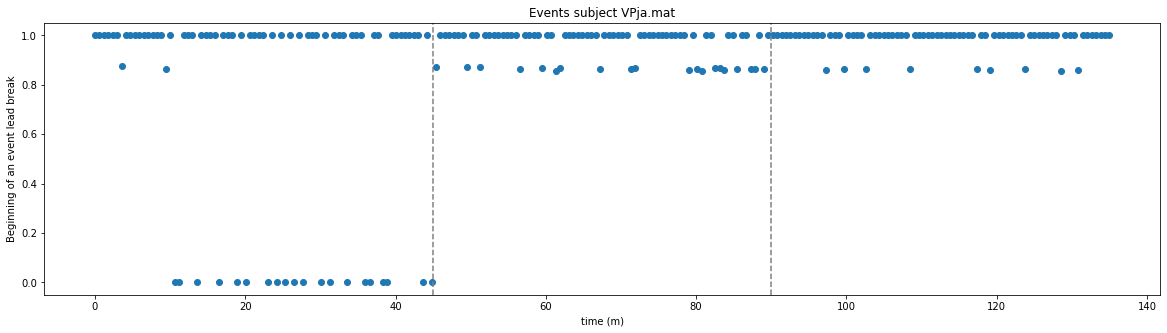

In [9]:
lead_brake_index = 63 # Index for channel 'lead_brake'
m = 100
events = np.array(car_brake[car_brake>0]/5).astype(int)
plt.figure(figsize=(20,5))
plt.plot(np.linspace(start = 0, stop = x.shape[1], num =len(x[lead_brake_index,events]))/200/60, x[lead_brake_index,events], linestyle=' ', marker="o")
plt.axvline(x=45, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.xlabel("time (m)")
plt.ylabel("Beginning of an event lead break")
plt.title('Events subject ' + file_name)

### Display distance to lead vehicle

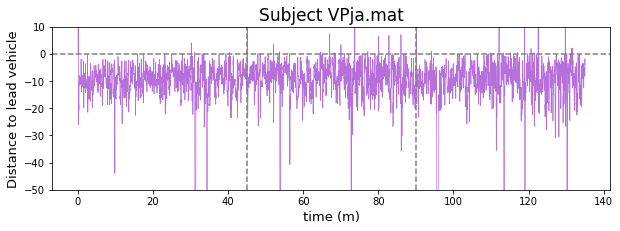

In [148]:
lead_brake_index = 63 # Index for channel 'lead_brake'
m = 100
events = np.array(car_brake[car_brake>0]/5).astype(int) # In time ms
plt.figure(figsize=(10,3))
plt.plot(np.linspace(0,len(x[64,:]),len(x[64,:]))/200/60, x[64,:], label="dist_to_lead", color='darkorchid', linewidth=0.7, alpha=0.7)
plt.axvline(x=45, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("time (m)",fontsize=13)
plt.ylim(-50,10)
plt.ylabel("Distance to lead vehicle",fontsize=13)
plt.title('Subject ' + file_name,fontsize=17)
plt.savefig("Plots/distance_to_lead_vehic.png",bbox_inches='tight')

### Display a typical event

In [32]:
# Event index
event_index = 2 #26 #144 #37, 144 #  Index of an event

# Target segment interval intial point, time step corresponds to 5ms
ts_i = 60

# Target segment interval intial point
ts_f = 260 

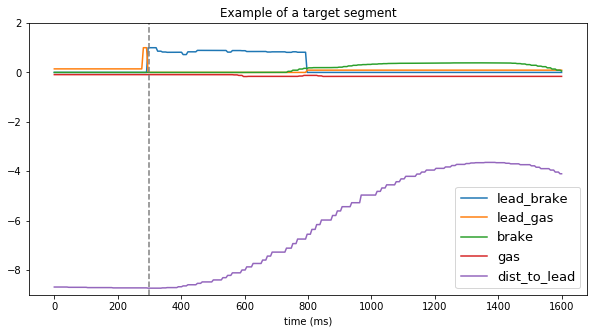

In [153]:
event_tiem = events[event_index]
plt.figure(figsize=(10,5))
x1 = np.linspace(start = 0, stop =(ts_i+ts_f)*5, num =(ts_i+ts_f))
plt.plot(x1,x[lead_brake_index,event_tiem-ts_i:event_tiem+ts_f], label="lead_brake")
plt.plot(x1,x[62,event_tiem-ts_i:event_tiem+ts_f], label="lead_gas")
plt.plot(x1,x[68,event_tiem-ts_i:event_tiem+ts_f], label = "brake")
plt.plot(x1,x[67,event_tiem-ts_i:event_tiem+ts_f], label = "gas")
#plt.plot(x1,x[61,event_tiem-ts_i:event_tiem+ts_f]/350, label = "EMGf")
plt.ylim(-9,2)
plt.plot(x1,x[64,event_tiem-ts_i:event_tiem+ts_f], label = "dist_to_lead")
plt.axvline(x=ts_i*5, color='gray', linestyle='--')
plt.xlabel("time (ms)")
plt.legend(fontsize=13)
plt.title("Example of a target segment") 
plt.savefig("Plots/typicalEvent_goodPerf.png")

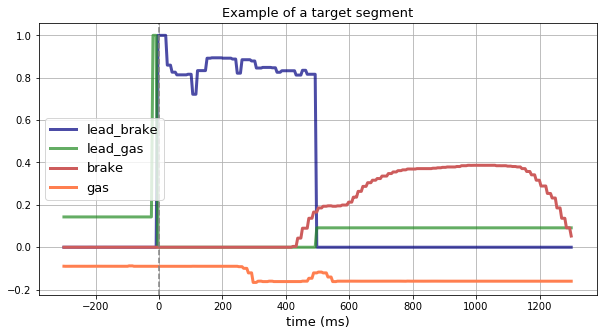

In [151]:
event_tiem = events[event_index]
plt.figure(figsize=(10,5))
x1 = np.linspace(start = 0, stop =(ts_i+ts_f)*5, num =(ts_i+ts_f))-ts_i*5
plt.plot(x1,x[lead_brake_index,event_tiem-ts_i:event_tiem+ts_f],'-', label="lead_brake", color='navy', linewidth=3,alpha=0.7)
plt.plot(x1,x[62,event_tiem-ts_i:event_tiem+ts_f],'-', label="lead_gas", color='forestgreen', linewidth=3,alpha=0.7)
plt.plot(x1,x[68,event_tiem-ts_i:event_tiem+ts_f], label = "brake", color='indianred', linewidth=3,alpha=1)
plt.plot(x1,x[67,event_tiem-ts_i:event_tiem+ts_f], label = "gas", color='coral', linewidth=3,alpha=1)
#plt.plot(x1,x[61,event_tiem-ts_i:event_tiem+ts_f]/350, label = "EMGf")
#plt.ylim(-9,4)
#plt.plot(x1,x[64,event_tiem-ts_i:event_tiem+ts_f], label = "dist_to_lead", color='powderblue', linewidth=3,alpha=1)
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("time (ms)",fontsize=13)
plt.legend(fontsize=13,loc = 'center left')
plt.title("Example of a target segment",fontsize=13)
plt.grid()
#plt.savefig("Plots/typicalEvent.png")

In [116]:
len(x1)

320

<br>
<hr>

## Event-related potentials (ERP)


Construct matrix with all target segments for channel chn_name

In [12]:
# Target segment interval intial point -> corresponds to 300ms
ts_i = 60 

# Target segment interval intial point -> corresponds to 1200ms
ts_f = 240 

# chn_name
chn_name = "P9"

In [13]:
A = np.zeros((len(events), ts_f+ts_i))
for event_index in range(len(events)-1):
    event_tiem = events[event_index]
    A[event_index,:] = x[np.where(np.asarray(name_elec) == chn_name)[0],event_tiem-ts_i:event_tiem+ts_f]
print(A.shape)   

(230, 300)


### Display chn_name ERP

Text(0.5, 1.0, 'Channel P9')

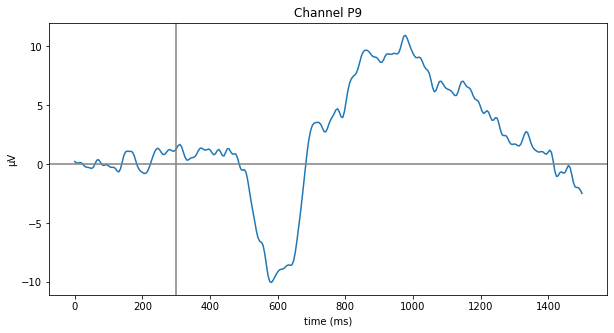

In [14]:
plt.figure(figsize=(10,5))
A_norm = np.subtract(A,np.array(A[:,:20].mean(1)).reshape(A.shape[0],1))
plt.plot(np.linspace(start = 0, stop = A_norm.shape[1]*5, num =A_norm.shape[1]), A_norm.mean(0))
plt.axvline(x=ts_i*5, color='gray', linestyle='-')
plt.axhline(y=0, color='gray', linestyle='-')
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title('Channel ' + chn_name)

Costruct matrix with non target segments 

In [15]:
# Intervals of segments without an event
noevents_int = np.append(np.append(0, events), x.shape[1])

# Length of intervals
noevents_len = np.diff(noevents_int)

# Index of EEG electrodes
channels_eeg = np.delete(np.arange(61), [0, 5])

In [16]:
gap_sml = 600 # corresponds to 3000 ms apart from any stimulus
nts_offset = 100 # 500 ms
A_noEvent = []
for event_index in range(len(noevents_len)):
    noevents_seg = int((noevents_len[event_index] - gap_sml*2 - ts_i + ts_f) / nts_offset)
    if(noevents_seg>0):
        for noevent_ix in range(noevents_seg):
            ip = noevents_int[event_index] + gap_sml + nts_offset*noevent_ix
            fp = ip + ts_i + ts_f
            A_noEvent.append(x[channels_eeg, ip:fp]) 

### Display normal activity 

Text(0.5, 1.0, 'Normal brain activity')

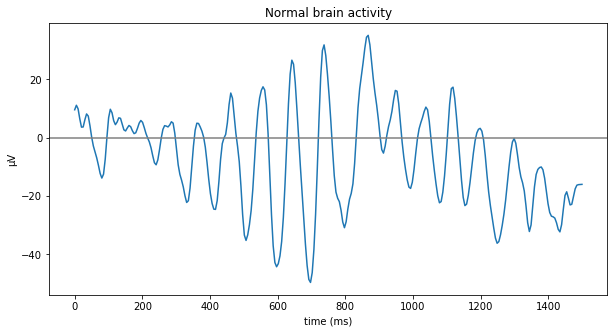

In [17]:
non_target_index = rnd.randint(0, len(A_noEvent))
plt.figure(figsize=(10,5))
A_norm = np.subtract(A_noEvent[non_target_index],np.array(A_noEvent[non_target_index][:,:20].mean(1)).reshape(A_noEvent[non_target_index].shape[0],1))
plt.plot(np.linspace(start = 0, stop = A_norm.shape[1]*5, num =A_norm.shape[1]), A_norm.mean(0))
plt.axhline(y=0, color='gray', linestyle='-')
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title('Normal brain activity')


### Display activity maps

In [18]:
# Load target segment
mat_pp_event = np.load(path_postprocess_mat + 'AllSubjects_events/VPja.mat_segment_3_event.npy')

# Load non-target segme,t
mat_pp_noevent = np.load(path_postprocess_mat + 'VPja_all/VPja.mat_segment_150_noevent.npy')

vmin = min(np.min(mat_pp_event),np.min(mat_pp_noevent))
vmax = min(np.max(mat_pp_event),np.max(mat_pp_noevent))

Text(0.5, 1.0, 'EEG for an event segment')

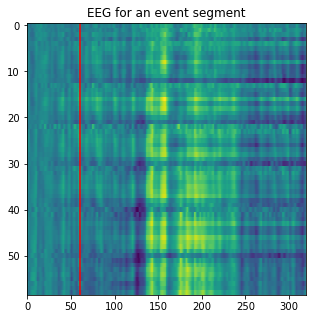

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(mat_pp_event, vmin=vmin, vmax=vmax, aspect='auto')
plt.axvline(x=60, color='red', linestyle='-')
plt.title('EEG for an event segment')

Text(0.5, 1.0, 'EEG for an normal segment')

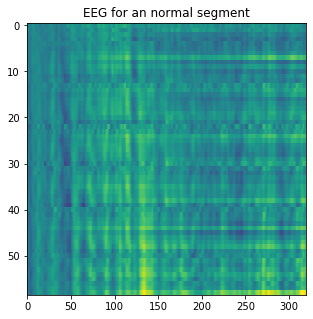

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(mat_pp_noevent, vmin=vmin, vmax=vmax, aspect='auto')
plt.title('EEG for an normal segment')

<br>
<hr>

## Performance measures


Define and compute relevant performence measures of the drivers actions

### Collision

Label event segments either as collision events or no collision evenet

In [21]:
# Find events with collision 
car_brake_y = car_brake[car_brake>0]
car_collision_y = car_collision[car_collision>0]
collison_label = []
for i in range(len(car_brake_y)):
    diff = car_collision_y - car_brake_y[i]
    if ( len(diff[diff>0])==0):
        collison_label.append(0)
    elif (min(diff[diff>0]) > 25000): # car_brake_y[i] is too far from any collision, so label = 0, 25000 is
        collison_label.append(0)
    else:
        collison_label.append(1)
events_collisions = np.where(np.asarray(collison_label)==1)[0]

Display a collision event

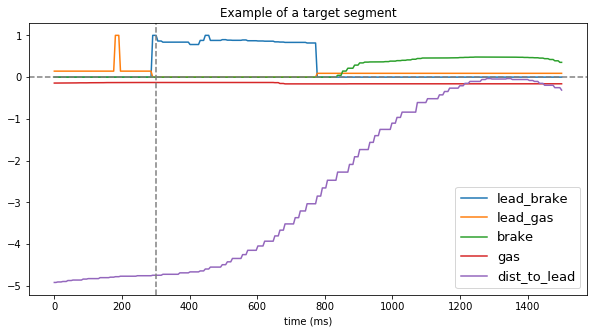

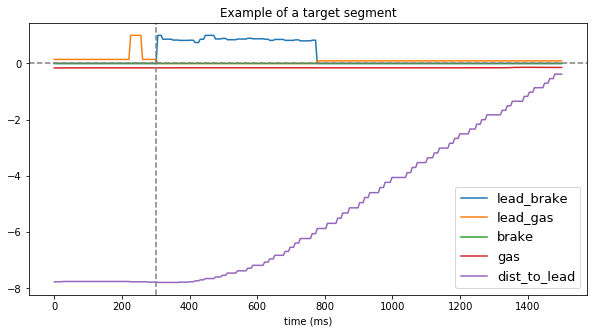

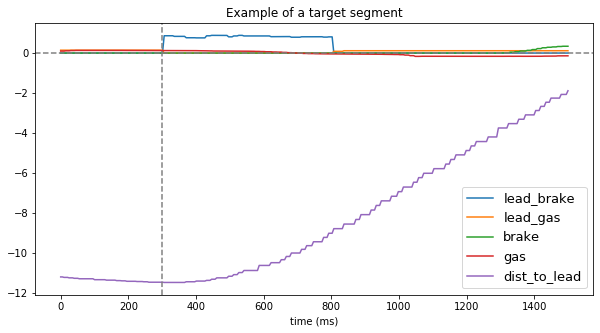

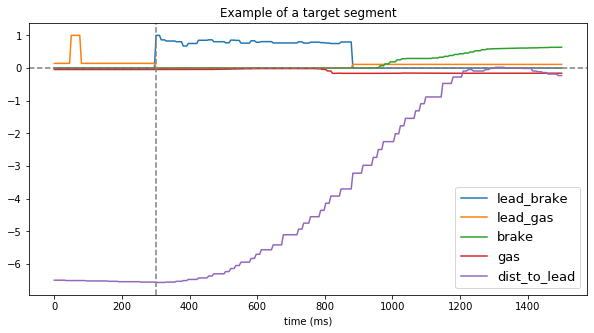

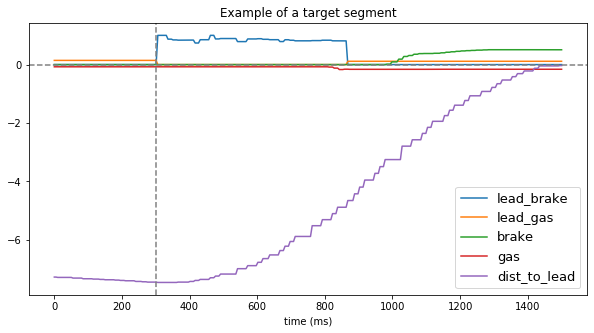

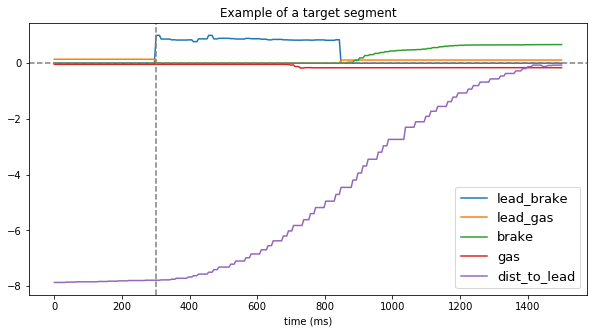

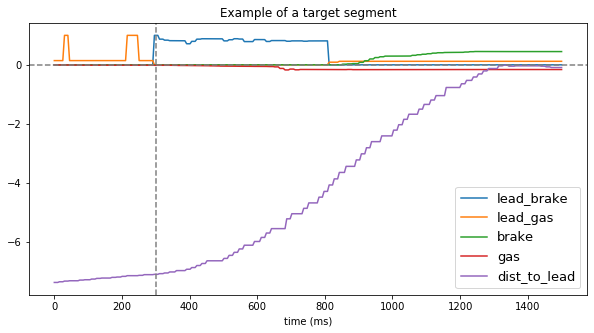

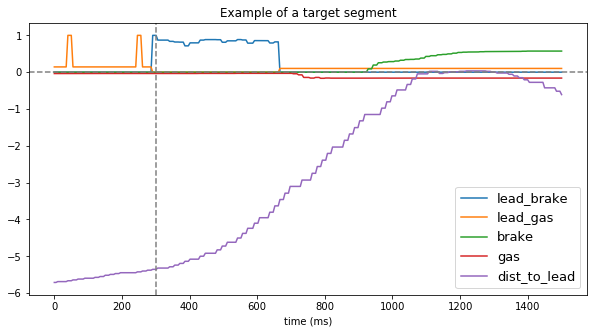

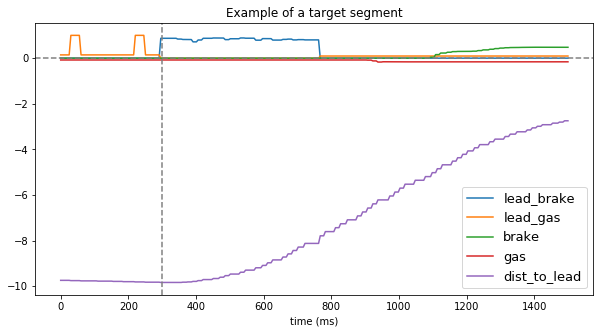

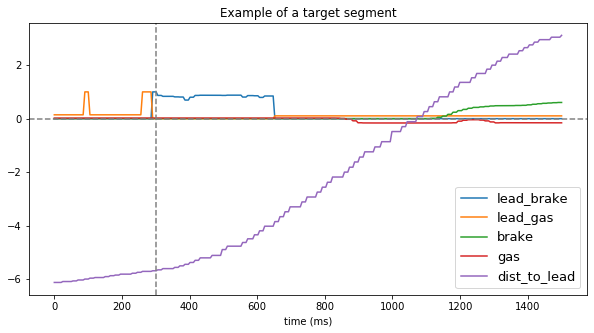

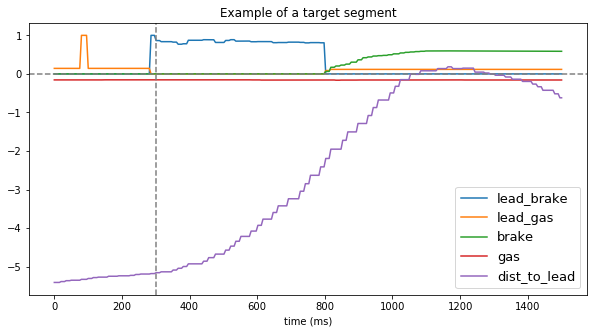

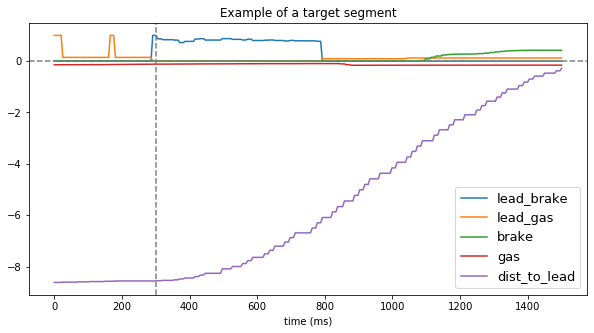

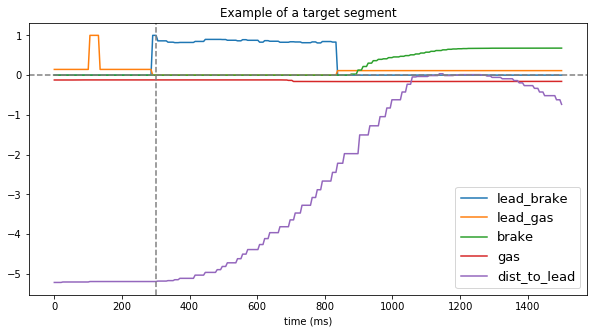

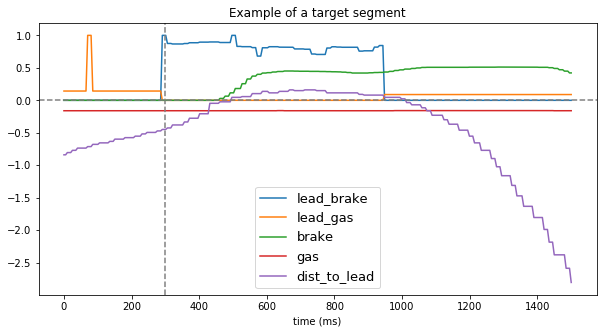

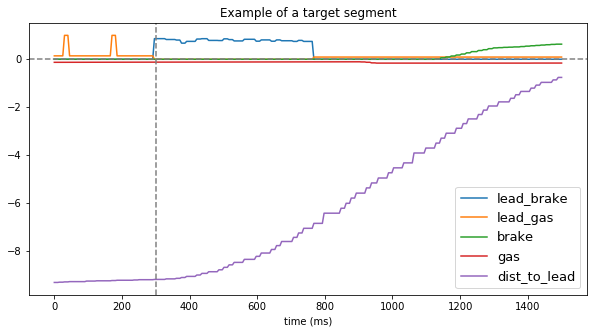

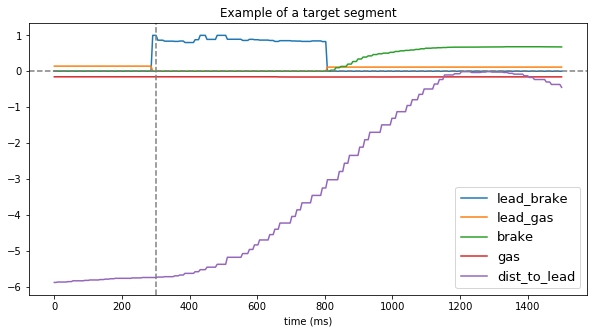

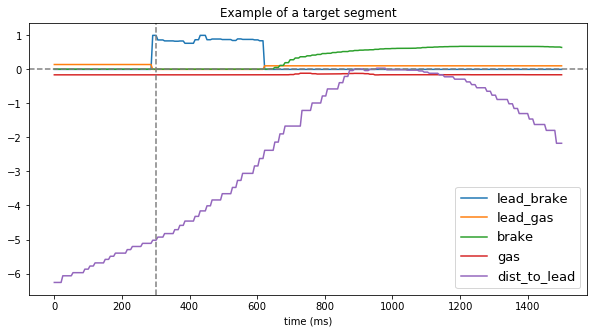

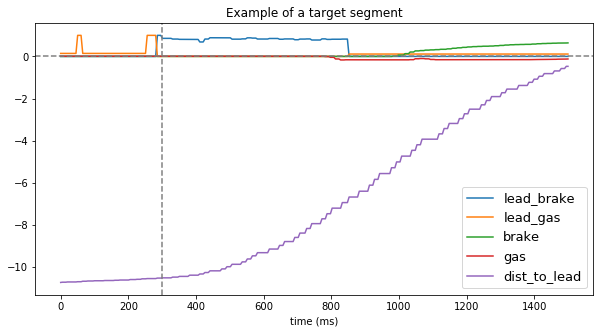

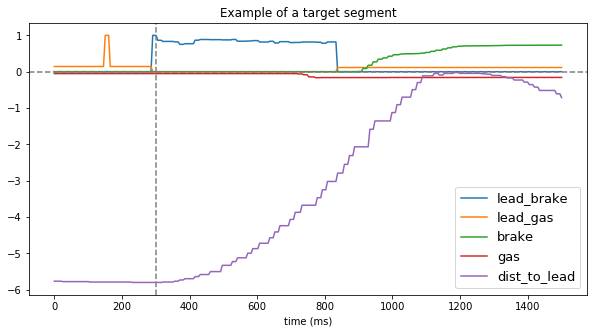

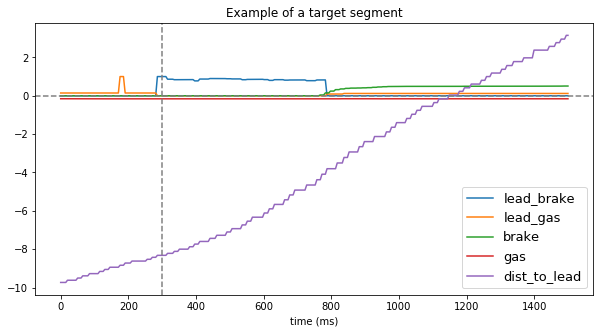

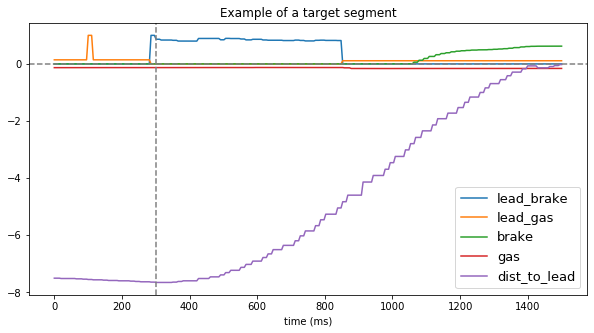

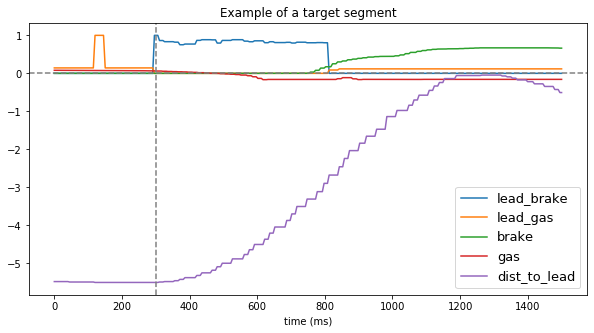

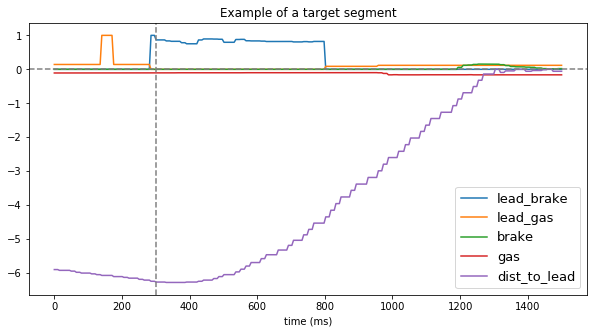

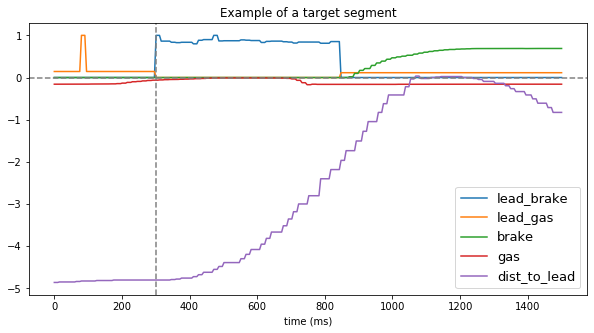

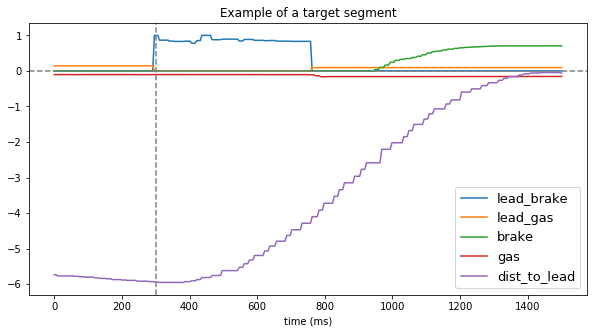

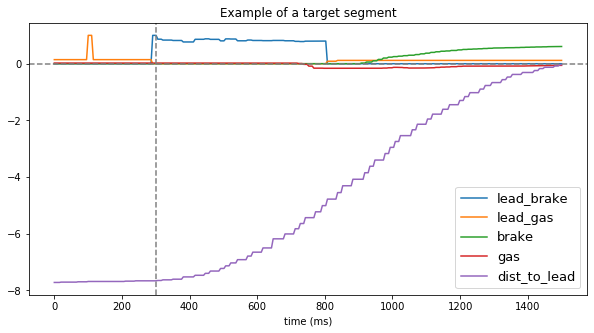

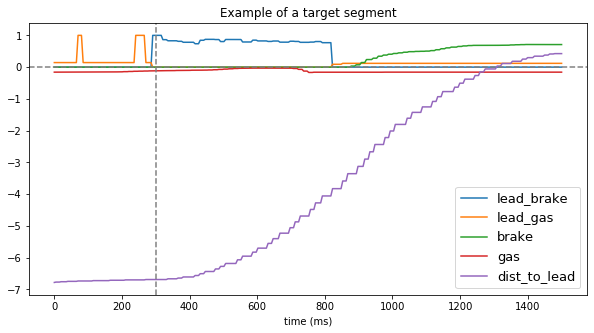

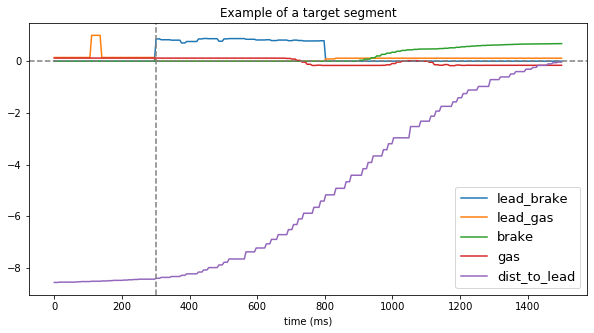

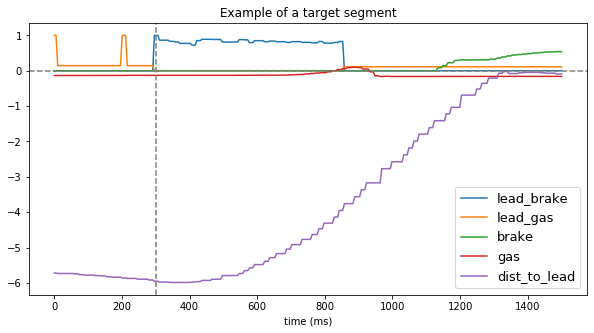

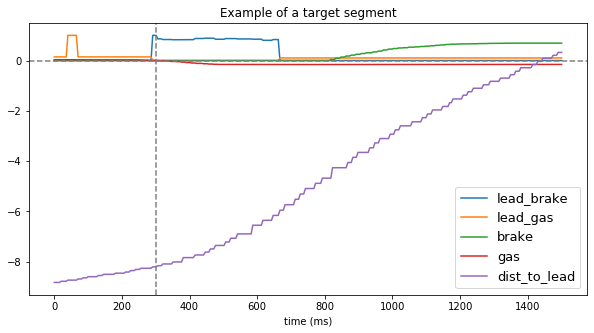

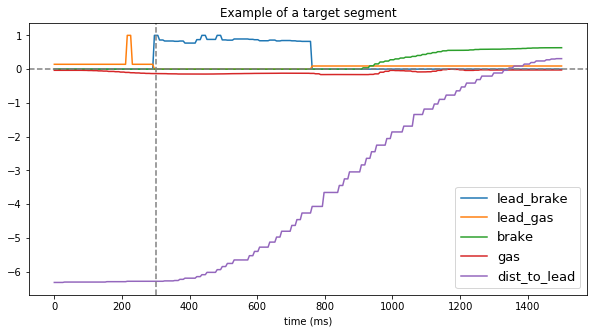

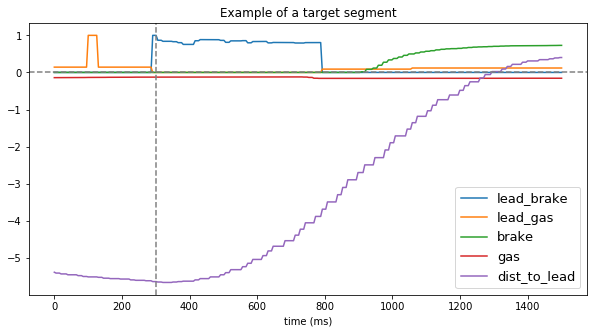

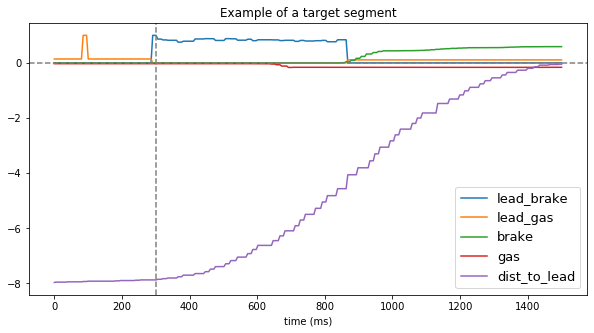

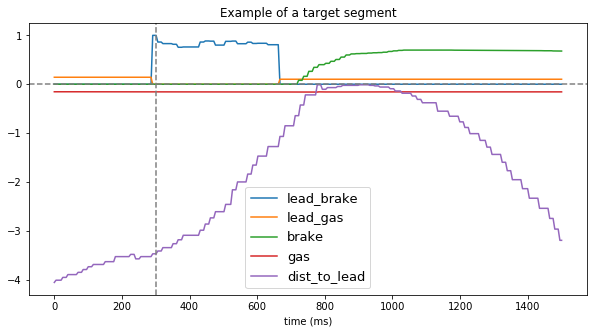

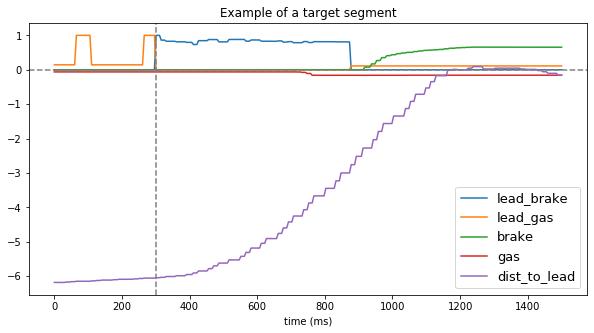

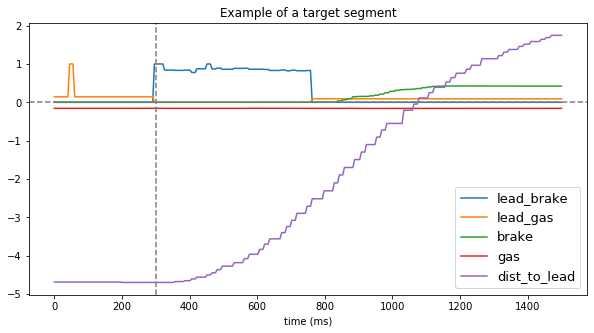

In [23]:
#plt.rcParams.update({'figure.max_open_warning': 1})
for event_collision in range(len(events_collisions)):
    event_tiem = events[events_collisions[event_collision]]
    plt.figure(figsize=(10,5))
    x1 = np.linspace(start = 0, stop =(ts_i+ts_f)*5, num =(ts_i+ts_f))
    plt.plot(x1,x[lead_brake_index,event_tiem-ts_i:event_tiem+ts_f], label="lead_brake")
    plt.plot(x1,x[62,event_tiem-ts_i:event_tiem+ts_f], label="lead_gas")
    plt.plot(x1,x[68,event_tiem-ts_i:event_tiem+ts_f], label = "brake")
    plt.plot(x1,x[67,event_tiem-ts_i:event_tiem+ts_f], label = "gas")
    #plt.plot(x1,x[61,event_tiem-ts_i:event_tiem+ts_f]/350, label = "EMGf")
    plt.plot(x1,x[64,event_tiem-ts_i:event_tiem+ts_f], label = "dist_to_lead")
    plt.axvline(x=ts_i*5, color='gray', linestyle='--')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.xlabel("time (ms)")
    plt.legend(fontsize=13)
    plt.title("Example of a target segment") 
    plt.savefig("Plots/collision_" + file_name[:4] +"/typicalEvent_" + str(event_collision) + ".png")
    plt.show()


Undersample no events

In [52]:
from sklearn.utils import resample

In [173]:
event_collison = np.where(np.asarray(collison_label)==1)[0]

In [174]:
event_not_collison = np.where(np.asarray(collison_label)==0)[0]

In [156]:
# downsample majority
event_not_collison_downsampled = resample(event_not_collison,
                                replace = False,                 # sample without replacement
                                n_samples = len(event_collison), # match minority n
                                random_state = 27)               # reproducible results

### Reaction time

Retain only events when the subject reacted, i.e. react_emg > 0

In [128]:
car_brake_y = car_brake[car_brake>0]
react_emg_y = react_emg[react_emg>0] # react_emg
react_time = []
event_noreact = []
for i in range(len(car_brake_y)): #
    diff = react_emg_y - car_brake_y[i]
    if ( len(diff[diff>0])==0):
        event_noreact.append(i)
    elif (min(diff[diff>0]) > 10000):
        event_noreact.append(i)
    else:
        react_time.append(min(diff[diff>0]))

(array([ 1.,  4., 63., 88., 48., 15.,  3.,  3.,  0.,  1.]),
 array([  25. ,  137.5,  250. ,  362.5,  475. ,  587.5,  700. ,  812.5,
         925. , 1037.5, 1150. ]),
 <a list of 10 Patch objects>)

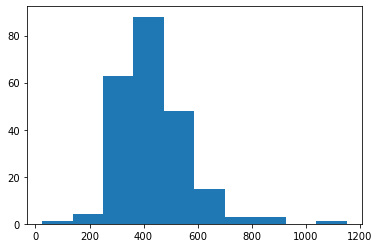

In [17]:
plt.hist(react_time)

No handles with labels found to put in legend.


431.1725663716814
16016.65606155533
126.55692814522376
226


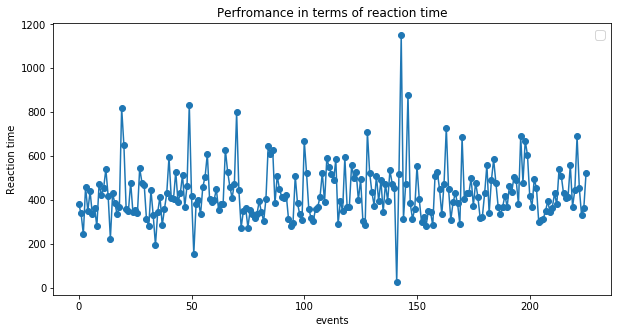

In [25]:
plt.figure(figsize=(10,5))
events_react_y = np.delete(events,event_noreact)
plt.plot(react_time,marker='o' ) # t/dist_to_lead
#temp = np.array(react_time)/400
#plt.plot(temp,marker='o' ) # t/dist_to_lead
plt.xlabel("events")
plt.ylabel("Reaction time")
plt.legend(fontsize=13)
plt.title("Perfromance in terms of reaction time")
react_time_mean = np.asarray(react_time).mean()
react_time_std = np.asarray(react_time).std()
print(np.asarray(react_time).mean())
print(np.asarray(react_time).var())
print(np.asarray(react_time).std())
print(len(react_time))

Compare to the experimental recording of reaction time

Text(0.5, 1.0, 'Perfromance in terms of reaction time')

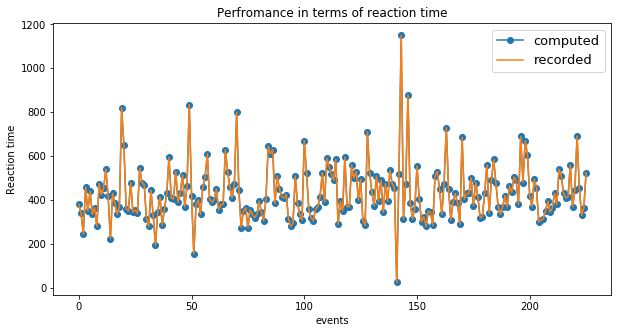

In [26]:
react_time_recorded = react[0][np.isfinite(react[0])]
plt.figure(figsize=(10,5))
events_react_y = np.delete(events,event_noreact)
plt.plot(react_time,marker='o', label="computed" ) # t/dist_to_lead
plt.plot(react_time_recorded, label="recorded")
#temp = np.array(react_time)/400
#plt.plot(temp,marker='o' ) # t/dist_to_lead
plt.xlabel("events")
plt.ylabel("Reaction time")
plt.legend(fontsize=13)
plt.title("Perfromance in terms of reaction time")

#react_time_exp = react[0][np.isfinite(react[0])]
#plt.plot(react_time_exp)
#print(len(react_time_exp))

Find the distribution of reaction time. It is used to compare the results of the NN when it is fitted over random values, following this distribution

In [27]:
from scipy.stats import norm
dist = norm(react_time_mean, react_time_std)
values = [value for value in range(100, 800)]
probabilities = [dist.pdf(value) for value in values]
s = np.random.normal(react_time_mean, react_time_std, 1)

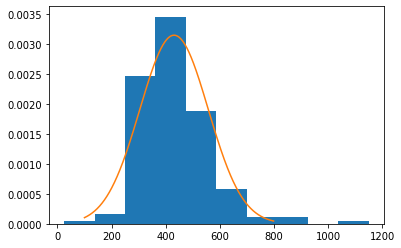

In [28]:
plt.hist(react_time, bins=10, density=True)
plt.plot(values, probabilities)
#plt.plot(s)

### Pilot behaivoral response - pedal brake

In [439]:
brake_pilot = []
space_intraevents = np.diff(events)
for i in range(len(events)):
    value_temp = np.where(np.diff(x[68][events[i]:])>1e-02)[0][0]
    if( i == 0 or i == len(events)-1):
        brake_pilot.append(value_temp) 
    elif(value_temp < space_intraevents[i]):
        brake_pilot.append(value_temp) # This is in ms 
    else: # This is when the pilot does not brake 
        brake_pilot.append(np.NaN)

In [ ]:
brake_pilot = []
space_intraevents = np.diff(events)
for i in range(len(events)):
    value_temp = np.where(np.diff(x[68][events[i]:])>1e-02)[0][0]
    if( i == 0):
        brake_pilot.append(value_temp) 
    elif(value_temp < space_intraevents[i-1]):
        brake_pilot.append(value_temp) # This is in ms 
    else: # This is when the pilot does not brake 
        brake_pilot.append(np.NaN)

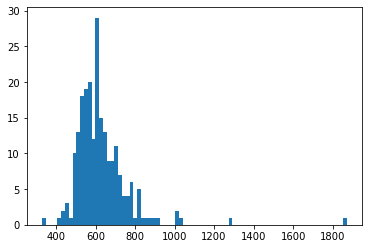

In [442]:
brake_pilot_react = np.delete(brake_pilot,event_noreact)
plt.hist(5*brake_pilot_react, bins=80)
plt.show()

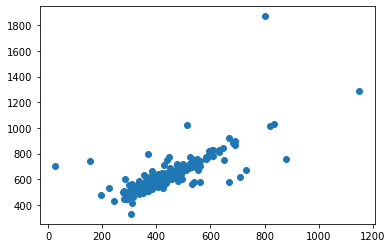

In [444]:
plt.plot(react_time,5*brake_pilot_react,'o')


In [449]:
brrrr = np.where(brake_pilot_react>100000)

/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [453]:
len(brrrr[0])

0

In [353]:
event_noreact
plt.figure(figsize=(10,5))
events_react_y = np.delete(events,event_noreact)
plt.plot(react_time,marker='o' ) # t/dist_to_lead
#temp = np.array(react_time)/400
#plt.plot(temp,marker='o' ) # t/dist_to_lead
plt.xlabel("events")
plt.ylabel("Reaction time")
plt.legend(fontsize=13)
plt.title("Perfromance in terms of reaction time")
react_time_mean = np.asarray(react_time).mean()
react_time_std = np.asarray(react_time).std()
print(np.asarray(react_time).mean())
print(np.asarray(react_time).var())
print(np.asarray(react_time).std())
print(len(react_time))

[39, 69, 117, 171]

### Performance in terms of (t,d)

Compute perfomance dfined as $\frac{t}{d^2}$, where $t$ is the reaction time and $d$ the distance to lead, at the moment of break

No handles with labels found to put in legend.


18.87932332963154
4.34503433008665


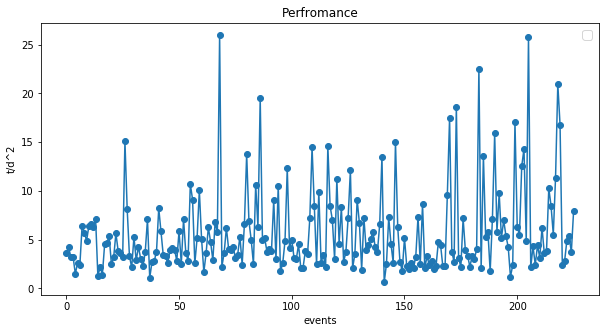

In [29]:
plt.figure(figsize=(10,5))
events_react_y = np.delete(events,event_noreact)
perf = react_time /np.power(x[64,events_react_y],2)
#plt.plot(perf/5,marker='o' ) # t/dist_to_lead
plt.plot(perf,marker='o' )
#temp = np.array(react_time)/400
#plt.plot(temp,marker='o' ) # t/dist_to_lead
plt.xlabel("events")
plt.ylabel("t/d^2")
plt.legend(fontsize=13)
plt.title("Perfromance")
print(np.asarray(perf).var())
print(np.asarray(perf).std())

Correlation between performance $\frac{t}{d^2}$ and the reaction time to breaking event

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Correlation between measures of perf')

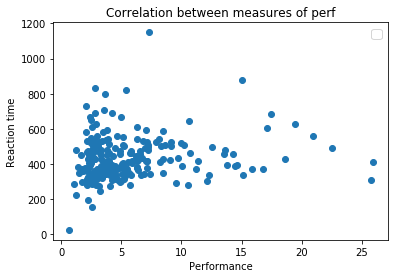

In [30]:
plt.plot(perf,react_time_recorded,marker='o',linestyle=" " )
plt.xlabel("Performance")
plt.ylabel("Reaction time")
plt.legend(fontsize=13)
plt.title("Correlation between measures of perf")

### Clustering 

Find cluster relationship between the EEG data and the associated perfomence defined by $\frac{t}{d^2}$

In [31]:
# Construct matrix mean of each channel for target segments 
ts_i = 60 # Target segment interval intial point -> corresponds to 300ms
ts_f = 240 # Target segment interval intial point -> corresponds to 1200ms
channels_eeg = np.arange(61)
channels_eeg = np.delete(channels_eeg, [0, 5])
A_mean = np.zeros((len(channels_eeg), len(events_react_y)))
for event_index in range(len(events_react_y)):
    event_tiem = events[event_index]
    A = x[channels_eeg,event_tiem-ts_i:event_tiem+ts_f]
    A_norm = np.subtract(A,np.array(A[:,:20].mean(1)).reshape(A.shape[0],1))
    A_mean[:,event_index] = A_norm.mean(1)

In [32]:
from scipy.stats import pearsonr

Correlation of  0.013881566521682424 with p-value:  0.8355893122128253


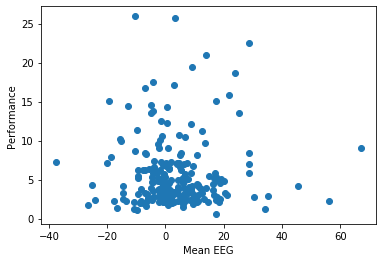

In [33]:
plt.plot(A_mean.mean(0),perf, marker = 'o' , linestyle=' ')
plt.xlabel('Mean EEG')
plt.ylabel('Performance')
R, p_value = pearsonr(A_mean.mean(0), perf)
print('Correlation of ', R , 'with p-value: ' , p_value)

In [34]:
# Construct matrix mean of each channel for target segments 
ts_i = 60 # Target segment interval intial point -> corresponds to 300ms
ts_f = 240 # Target segment interval intial point -> corresponds to 1200ms
channels_eeg = np.arange(61)
channels_eeg = np.delete(channels_eeg, [0, 5])
A_mean = np.zeros((len(channels_eeg), len(events)))
for event_index in range(len(events)):
    event_tiem = events[event_index]
    A = x[channels_eeg,event_tiem-ts_i:event_tiem+ts_f]
    A_norm = np.subtract(A,np.array(A[:,:20].mean(1)).reshape(A.shape[0],1))
    A_mean[:,event_index] = A_norm.mean(1)

Correlation of  0.032989926596919586 with p-value:  0.6186767695786535


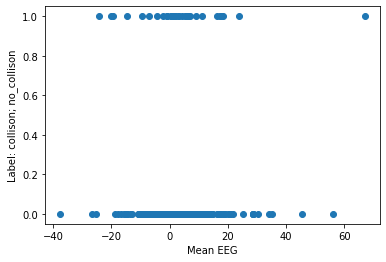

In [163]:
plt.plot(A_mean.mean(0), collison_label, marker = 'o' , linestyle=' ')
plt.xlabel('Mean EEG')
plt.ylabel('Label: collison; no_collison')
R, p_value = pearsonr(A_mean.mean(0), collison_label)
print('Correlation of ', R , 'with p-value: ' , p_value)
#print('f1 score ', f1_score(kmeans.labels_, collison_label) )

In [ ]:
# SO just the mean doesn't show anything
# Should I look at the variation?
# The max?
# Look at how to cluster multi dimensional vector to 0,1 labels in EEG

Correlation of  0.2550025029535681 with p-value:  9.188128088137859e-05


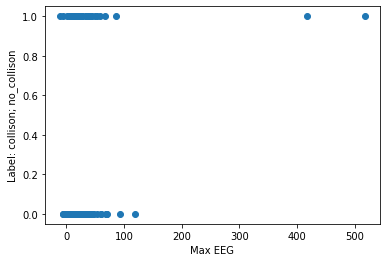

In [36]:
plt.plot(A_mean.max(0), collison_label, marker = 'o' , linestyle=' ')
plt.xlabel('Max EEG')
plt.ylabel('Label: collison; no_collison')
R, p_value = pearsonr(A_mean.max(0), collison_label)
print('Correlation of ', R , 'with p-value: ' , p_value)

Correlation of  0.17947553468668342 with p-value:  0.0063478987558951115


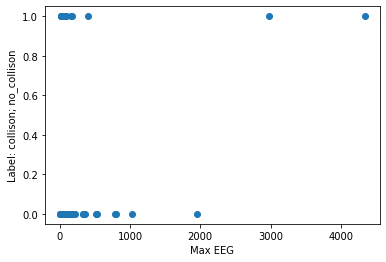

In [37]:
plt.plot(A_mean.var(0), collison_label, marker = 'o' , linestyle=' ')
plt.xlabel('Max EEG')
plt.ylabel('Label: collison; no_collison')
R, p_value = pearsonr(A_mean.var(0), collison_label)
print('Correlation of ', R , 'with p-value: ' , p_value)

In [63]:
A_mean.shape

(59, 230)

In [38]:
from sklearn.metrics import pairwise

In [39]:
A_mat = np.reciprocal(pairwise.euclidean_distances(A_mean.T))
np.fill_diagonal(A_mat,0)

/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  """Entry point for launching an IPython kernel.


In [40]:
# Order columns according to coallison labels, first collison (1) then no collison)
A_order = A_mat.take(np.concatenate((event_collison,event_not_collison)),0)

(230, 230)

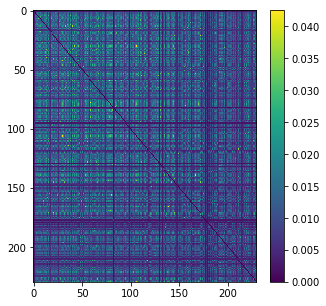

In [172]:
plt.figure(figsize=(5,5))
plt.imshow(A_order, aspect='auto')
# Organize by labels
plt.colorbar()

In [199]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, affinity='precomputed', n_init=100,assign_labels='discretize')
sc.fit_predict(A_mat)  
print(f1_score(sc.fit_predict(A_mat) , collison_label))

0.2608695652173913


In [200]:
# Threshold network to get most relevant links
A_thresh = (A_mat>0.017) * A_mat

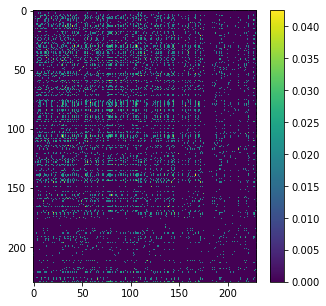

In [201]:
plt.figure(figsize=(5,5))
plt.imshow(A_thresh, aspect='auto')
plt.colorbar()

In [202]:
A_binary = A_thresh
A_binary[A_binary>0]=1

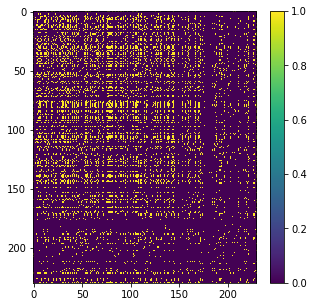

In [203]:
plt.figure(figsize=(5,5))
plt.imshow(A_binary, aspect='auto')
plt.colorbar()

In [47]:
import networkx as nx

In [48]:
G = nx.Graph(A_binary)

In [167]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(2, affinity='precomputed', n_init=100,assign_labels='discretize')
sc.fit_predict(A_binary)  
print(f1_score(sc.fit_predict(A_binary) , collison_label))

0.07547169811320754


/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [49]:
nx.density(G)

0.12804252895386367

In [55]:
event_collison

array([ 26,  39,  47,  56,  57,  64,  81,  82,  87,  88,  96, 110, 111,
       117, 121, 123, 129, 137, 143, 147, 149, 173, 174, 177, 189, 193,
       196, 199, 203, 205, 206, 207, 208, 209, 221, 223])

In [ ]:
nx.draw_networkx(G)
# nodes
nx.draw_networkx_nodes(G,collison_label,
                       nodelist=event_collison,
                       node_color='r')

In [114]:
from networkx.algorithms import community

In [221]:
results_mod = community.greedy_modularity_communities(G)

In [222]:
communtites_size = []
for i in range(len(results_mod)):
    communtites_size.append(len(results_mod[i]))

In [223]:
np.array(communtites_size)

array([85, 76, 25,  4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [215]:
collison_0 = np.where(np.asarray(collison_label)==0)[0]
collison_1 = np.where(np.asarray(collison_label)==1)[0]
print("There are ", len(collison_0), 'normal events, and ',len(collison_1), 'collison events' )

There are  194 normal events, and  36 collison events


In [228]:
community.is_partition(G, [collison_label])

False

In [235]:
list(community.k_clique_communities(G, 36))

[]

In [232]:
G.is_directed()

False

In [220]:
collison_1

array([ 26,  39,  47,  56,  57,  64,  81,  82,  87,  88,  96, 110, 111,
       117, 121, 123, 129, 137, 143, 147, 149, 173, 174, 177, 189, 193,
       196, 199, 203, 205, 206, 207, 208, 209, 221, 223])

In [87]:
G = nx.complete_graph(5)
K5 = nx.convert_node_labels_to_integers(G,first_label=2)
G.add_edges_from(K5.edges())
c = list(nx.k_clique_communities(G, 4))
list(c[0])

AttributeError: module 'networkx' has no attribute 'k_clique_communities'

In [ ]:
list(nx.k_clique_communities(G, 6))

In [152]:
# Construct matrix mean over all channels by time segments (for target segments )
ts_i = 60 # Target segment interval intial point -> corresponds to 300ms
ts_f = 240 # Target segment interval intial point -> corresponds to 1200ms
channels_eeg = np.arange(61)
channels_eeg = np.delete(channels_eeg, [0, 5])
n = 10
A_mean_50 = np.zeros((n*3, len(events)))
A_big= np.zeros((n*3*59, len(events)))
for event_index in range(len(events)):
    event_tiem = events[event_index]
    A = x[channels_eeg,event_tiem-ts_i:event_tiem+ts_f]
    A_norm = np.subtract(A,np.array(A[:,:20].mean(1)).reshape(A.shape[0],1))
    A_mean_segment = np.asarray([A_norm[:,i:i+n].mean(1) for i in range(0,A_norm.shape[1],n)]).T
    A_mean_50[:,event_index] = A_mean_segment.mean(0)
    A_big[:,event_index] = A_mean_segment.reshape(-1)

In [234]:
print(A_mean_50.shape) # Per each time segment contains the mean over electrodes
print(A_big.shape) # Contains the mean per time segment for each electrode 
# I'd like now to find the pairwise distance between vectors of size 59
# Becuase what I've done is pairwise mean distance over time and electrodes.

(30, 230)
(1770, 230)


In [236]:
from scipy.spatial import distance_matrix

In [246]:
# Build an ensamble of 30 distance matrices
A_big_dist_ensamble = []
for i in range(30):
    A_big_dist_ensamble.append(distance_matrix(A_big[i*59:59*(i+1),:].T,A_big[i*59:59*(i+1),:].T))

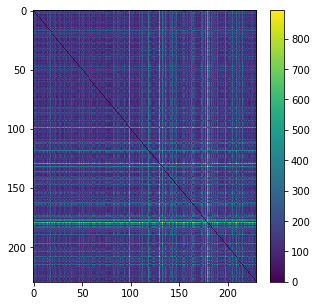

In [252]:
plt.figure(figsize=(5,5))
plt.imshow(A_big_dist_ensamble[27], aspect='auto')
plt.colorbar()

In [291]:
sc = SpectralClustering(2, affinity='rbf', n_init=1000,assign_labels='discretize')
f1score_ensamble=[]
for i in range(len(A_big_dist_ensamble)):
    #sc.fit_predict(A_big_dist_ensamble[i])  
    f1score_ensamble.append(f1_score(sc.fit_predict(A_big_dist_ensamble[i]) , np.array(collison_label)))

/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/obando_c/anaconda3/envs/E

/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/sklearn/cluster/_spectral.py:482: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/Users/obando_c/anaconda3/envs/E

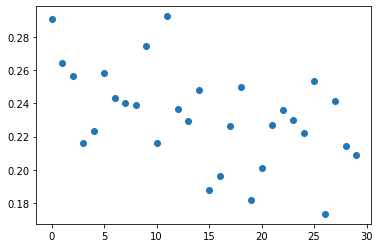

In [290]:
plt.plot(f1score_ensamble,'o')

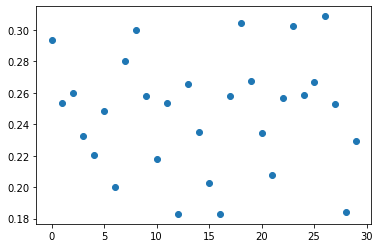

In [292]:
plt.plot(f1score_ensamble,'o')

In [243]:
A_big_dist = distance_matrix(A_big.T,A_big.T)
A_big_dist_mat = np.reciprocal(A_big_dist)

/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  


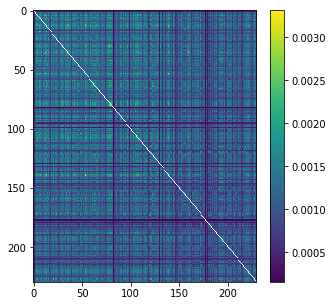

In [244]:
plt.figure(figsize=(5,5))
plt.imshow(A_big_dist_mat, aspect='auto')
plt.colorbar()

In [156]:
# A_big contains vectors with mean values of activity per epochs of 50ms per eeg channel 
# I tried kmeans, which is not the best for vey high idmensions, so below try other methods
# 1770 = 59 (#eeg channel) * 30 (epochs) 
print(A_big.shape)
#print(A_mean_50.shape)
kmeans = KMeans(n_clusters=2)
kmeans.fit(A_big.T)
print(len(kmeans.labels_))
print(f1_score(kmeans.labels_, collison_label))

(1770, 230)
230
0.10526315789473684
0.10526315789473684


In [ ]:
A_big_order = A_big[np.concatenate((event_collison,event_not_collison)),:]

/Users/obando_c/anaconda3/envs/EmergencyBraking/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  """Entry point for launching an IPython kernel.


(230, 230)


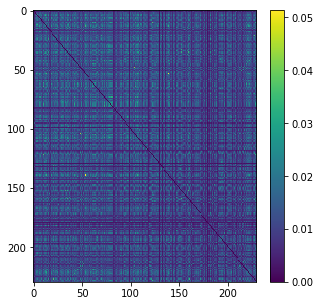

In [227]:
#A_mat_50 = np.reciprocal(pairwise.euclidean_distances(A_mean_50.T))
A_mat_50 = np.reciprocal(pairwise.euclidean_distances(A_mean_50.T))
np.fill_diagonal(A_mat_50,0)
print(A_mat_50.shape)
plt.figure(figsize=(5,5))
plt.imshow(A_mat_50, aspect='auto')
plt.colorbar()

In [231]:
A_mat_50_order = A_mat_50[np.concatenate((event_collison,event_not_collison)),:]

In [217]:
# Order columns according to coallison labels, first collison (1) then no collison)
A_mat_50_order = A_mat_50.take(np.concatenate((event_collison,event_not_collison)),0)

(230, 230)


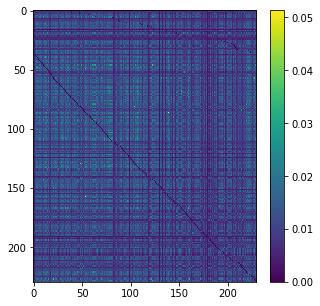

In [232]:
print(A_mat_50_order.shape)
plt.figure(figsize=(5,5))
plt.imshow(A_mat_50_order, aspect='auto')
plt.colorbar()

(230, 230)


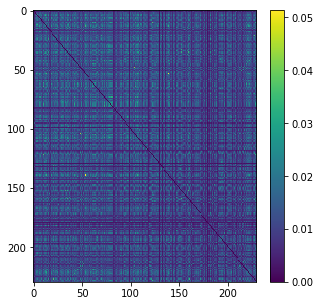

In [216]:
sc = SpectralClustering(2, affinity='precomputed', n_init=100000,assign_labels='discretize')
sc.fit_predict(A_mat_50)  
print(f1_score(sc.fit_predict(A_mat_50) , collison_label))

0.2777777777777778


In [119]:
from sklearn.cluster import KMeans

In [143]:
print(A_mean_50.shape)
kmeans = KMeans(n_clusters=2)
kmeans.fit(A_mean_50.T)
print(len(kmeans.labels_))

(30, 230)
230


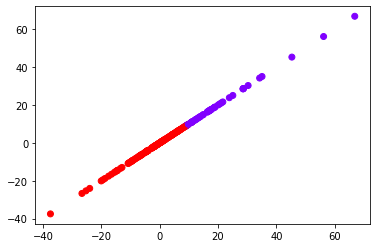

In [138]:
plt.scatter(A_mean_50.mean(0),A_mean_50.mean(0), c=kmeans.labels_, cmap='rainbow')

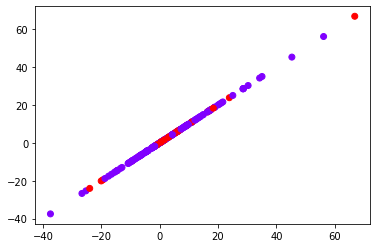

In [139]:
plt.scatter(A_mean_50.mean(0),A_mean_50.mean(0), c=collison_label, cmap='rainbow')

In [140]:
from sklearn.metrics import f1_score

In [141]:
print(f1_score(kmeans.labels_, collison_label))

0.26666666666666666


In [ ]:
# Cluster data - event - no event 

(array([68., 82., 36., 17.,  5.,  8.,  4.,  2.,  2.,  2.]),
 array([ 0.60612899,  3.14017528,  5.67422157,  8.20826785, 10.74231414,
        13.27636043, 15.81040672, 18.34445301, 20.8784993 , 23.41254559,
        25.94659187]),
 <a list of 10 Patch objects>)

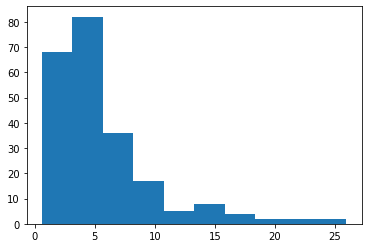

In [36]:
plt.hist(perf)

In [114]:
test_example = np.load('/Users/obando_c/Documents/Neuro/EmergencyBraking/data/post_processed/AllSubjects_balanced_collison/VPgal.mat_segment_19_noevent.npy')


In [115]:
type(test_example)

numpy.ndarray

In [116]:
test_example.shape

(59, 320)

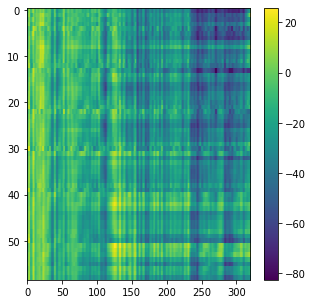

In [102]:
plt.figure(figsize=(5,5))
plt.imshow(test_example, aspect='auto')
plt.colorbar()

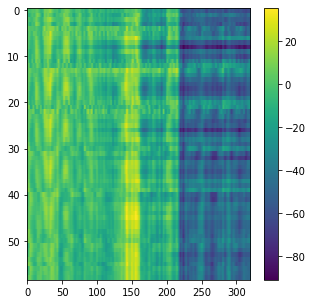

In [106]:
plt.figure(figsize=(5,5))
plt.imshow(test_example, aspect='auto')
plt.colorbar()

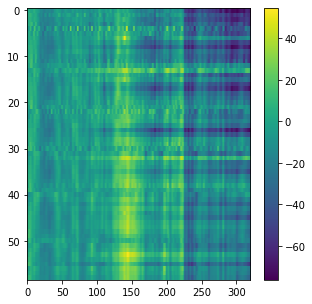

In [110]:
plt.figure(figsize=(5,5))
plt.imshow(test_example, aspect='auto')
plt.colorbar()

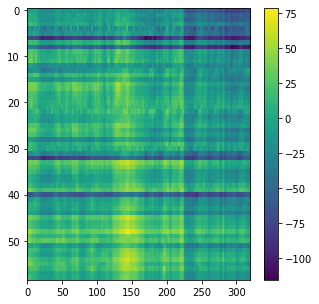

In [117]:
plt.figure(figsize=(5,5))
plt.imshow(test_example, aspect='auto')
plt.colorbar()

In [1]:
import os
import torch

In [166]:
path_to_data = os.path.normpath(os.path.join('/Users/obando_c/Documents/Neuro/EmergencyBraking/data/post_processed/AllSubjects_events_noevents'))  #

In [167]:
files = sorted([elt for elt in os.listdir(path_to_data) if elt[-4:] == '.npy'],
                   key=(lambda x: int(x.split('_')[2])))

In [169]:
for file in files:
    # Binary LEBEL classification: event; noevent
    label = {'event': 1.0, 'noevent': 0.0}[file.split('_')[-1].split('.')[0]]
    label = torch.from_numpy(np.array(label)).float()
    labels.append(label)

NameError: name 'torch' is not defined

In [294]:
import mne

In [310]:
from mne.externals.pymatreader import read_mat

In [311]:
fname = path_data_mat + file_name

In [312]:
mat_data = read_mat(fname)

In [327]:
name_elec(channels_eeg

TypeError: only integer scalar arrays can be converted to a scalar index

In [334]:
type(np.array(channels_eeg)[0])

numpy.int64

In [333]:
x.shape[int(np.array(channels_eeg)),:]

TypeError: only size-1 arrays can be converted to Python scalars

In [322]:
name_elec[channels_eeg]

TypeError: only size-1 arrays can be converted to Python scalars

In [315]:
info = mne.create_info (ch_names = name_elec, sfreq = 200) #, ch_types = ch_types)

In [316]:
raw = mne.io.RawArray (mat_data, info)

TypeError: float() argument must be a string or a number, not 'dict'